In [2]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import pywt
import ctypes
import bitarray
import struct
import util
from bitstring import BitArray
%matplotlib inline

In [3]:
def plot_image(r, g, b, cmap='gray'):
    plt.clf()
    plt.subplot(3,1,1)
    plt.imshow(r, cmap=cmap)
    plt.subplot(3,1,2)
    plt.imshow(g, cmap=cmap)
    plt.subplot(3,1,3)
    plt.imshow(b, cmap=cmap)
    plt.draw()
    plt.show()

def ims(x):
    plt.clf()
    plt.imshow(x, cmap='gray')
    plt.draw()
    plt.show()

In [4]:
im = Image.open("bird.jpg") #Can be many different formats.
pix = im.load()
print im.size #Get the width and hight of the image for iterating over
# print pix[x,y] #Get the RGBA Value of the a pixel of an image
width, height = im.size

(700, 700)


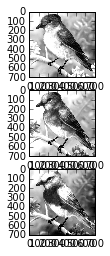

In [5]:
r = np.array(im.getdata(0)).reshape(height, width)
g = np.array(im.getdata(1)).reshape(height, width)
b = np.array(im.getdata(2)).reshape(height, width)
plot_image(r, g, b)

In [8]:
import time
start_time = time.time()

transform = np.matrix('.299, .587, .114; -.16874, -.33126, .5; .5, -.41869, -.08131')
Y = np.zeros(np.shape(r));
Cb = np.zeros(np.shape(r));
Cr = np.zeros(np.shape(r));

for i in range(np.shape(r)[0]):
    for j in range(np.shape(r)[1]):
        RGB = np.matrix('{0}; {1}; {2}'.format(r.item((i,j)), g.item((i,j)), b.item((i,j))));
        YCbCr = transform * RGB;
        Y[i,j] = YCbCr.item(0,0);
        Cb[i,j] = YCbCr.item(1,0);       
        Cr[i,j] = YCbCr.item(2,0);        
        
print time.time() - start_time

13.7896029949


In [9]:
start_time = time.time()

transform = np.matrix('.299, .587, .114; -.16874, -.33126, .5; .5, -.41869, -.08131')
def apply_transform(rgb):
    #print rgb
    return np.array(np.dot(transform, rgb))[0]

mat = np.dstack((r,g,b))
ycbcr = np.apply_along_axis(apply_transform, 2, mat)
print time.time() - start_time

4.37080311775


In [24]:
x = np.array([[1, 2], [3, 4]])
y = np.array([[3, 4], [1, 2]])
np.dstack((x,y)).shape

(2, 2, 2)

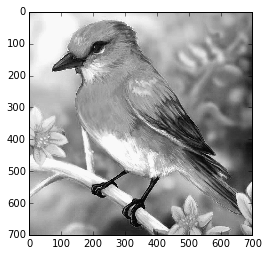

In [8]:
plt.clf()
plt.imshow(Y + Cb + Cr, cmap='gray')
plt.draw()

2324
253.796901893


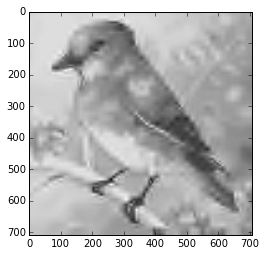

In [9]:
x = Y

lev = 4
wav = 'db3'

wp = pywt.WaveletPacket2D(data=x, wavelet=wav, maxlevel=lev, mode='sym')

wps = wp.get_level(lev)

dec = map(lambda x: x.data, wps)
paths = map(lambda x: x.path, wps)

data = np.vstack(dec)
s = np.std(data)

wp2 = pywt.WaveletPacket2D(data=None, wavelet=wav, maxlevel=lev, mode='sym')


thres = 500

res = 0

for p, d in zip(paths, dec):
    dd = np.copy(d)
    dd[abs(d) < thres] = 0
    wp2[p] = dd
    res += np.sum(dd != 0)




print(res)
print(float(data.size) / float(res))


ims(wp2.reconstruct())

In [10]:
def binary(num):
    return ''.join(bin(ord(c)).replace('0b', '').rjust(8, '0') for c in struct.pack('!f', num))

def bitstofloat(bits):
    a = BitArray();
    a.bin = bits;
    return a.float;

In [12]:
length = 0;
thres = 100;
for d in dec:
    dd = np.float32(d);
    dd[abs(d) < thres] = 0;
    indicesrow, indicescol = np.nonzero(dd);
    count = len(indicesrow);
    output = binary(count);
    for row, col in zip(indicesrow, indicescol):
        output += binary(row) + binary(col);
        output += binary(dd[row][col]);
    length += util.compress(np.array(output))
    
print length
        
        
    
    
    

TypeError: unsupported operand type(s) for +=: 'int' and 'bitarray'

In [17]:
length = 0;
thres = 500;

uncompressed = '';


for d in dec:
    dd = np.float32(d);
    dd[abs(d) < thres] = 0;
    for i in range(np.shape(dd)[0]):
        for j in range(np.shape(dd)[1]):
            uncompressed += binary(dd[i][j]);
#length = len(final)
print len(uncompressed)
compressed = util.compress(np.array(uncompressed));

print len(compressed) % 8

18874368
0


In [18]:
uncompressed = util.decompress(compressed)
print len(uncompressed)

18874368


In [15]:
print len(uncompressed)

18874368


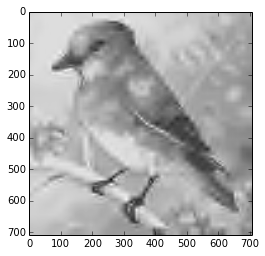

In [323]:
numCoeff = len(final) / 32 / 256
lev = 4
wav = 'db3'
wp2 = pywt.WaveletPacket2D(data=None, wavelet=wav, maxlevel=lev, mode='sym')

coeff = np.zeros(len(final)/32)
for i in range(len(final) / 32):
    coeff[i] = bitstofloat(final[32*i:32*i+32])
    
drows = 48;
dcols = 48;

for pindex in range(len(paths)):
    dd = np.zeros((drows, dcols));
    for i in range(drows*dcols):
        dd[int(np.floor(i/dcols))][i%drows] = coeff[drows*dcols*pindex + i];
    wp2[paths[pindex]] = dd;
    
ims(wp2.reconstruct())

In [313]:
len(coeff)

589824

In [320]:
44%12

8

In [322]:
np.floor(44/12)

3.0

In [136]:
np.nonzero(x)

(matrix([[0, 0, 1, 1, 2, 2]], dtype=int64),
 matrix([[0, 1, 0, 2, 0, 1]], dtype=int64))

In [99]:
np.shape(dec)

(256L, 48L, 48L)

error: cannot convert argument to integer

In [95]:

bitarray.bitarray(binary(34.3))

bitarray('01000010000010010011001100110011')